<a href="https://colab.research.google.com/github/palash04/Artificial-Intelligence/blob/master/Neural_Networks/Conv_NN/_02_Intro_to_conv_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Screenshot 2020-07-07 at 11 30 50](https://user-images.githubusercontent.com/26361028/86723205-5041fe00-c045-11ea-8bfd-4fb44ece75f4.png)
![Screenshot 2020-07-07 at 11 35 48](https://user-images.githubusercontent.com/26361028/86723959-0279c580-c046-11ea-92eb-81a2f05baa94.png)

These filters calculate a difference between neighboring pixels and around a center pixel.

![Screenshot 2020-07-07 at 11 45 11](https://user-images.githubusercontent.com/26361028/86725487-520cc100-c047-11ea-90a0-076b7e4cec1f.png)


In [1]:
imagefilepath = '/content/drive/My Drive/Artificial Intelligence/DataSet/curved_lane.jpg'

# Creating a Filter, Edge Detection

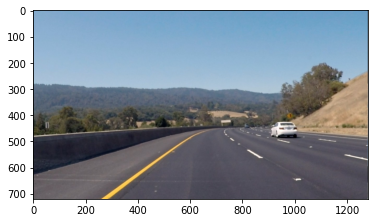

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# read in the image
image = mpimg.imread(imagefilepath)
plt.imshow(image)

#### Convert the image to grayscale image

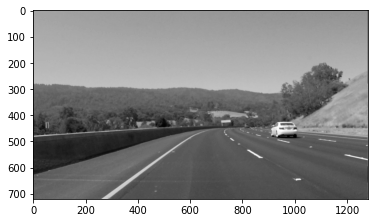

In [9]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

#### Create a custom kernel

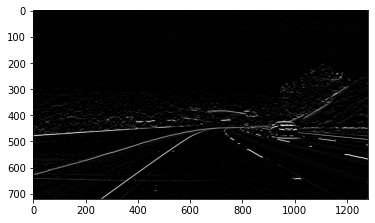

In [13]:
# 3x3 array for edge detection
sobel = np.array([[-1,-2,-1],
                  [0,0,0],
                  [1,2,1]])

# filter the image using filter2D 
filtered_image = cv2.filter2D(gray, -1, sobel)
plt.imshow(filtered_image, cmap='gray')

![Screenshot 2020-07-07 at 12 07 59](https://user-images.githubusercontent.com/26361028/86728908-80d86680-c04a-11ea-8d70-e5111236b7fd.png)
![Screenshot 2020-07-07 at 12 08 21](https://user-images.githubusercontent.com/26361028/86728960-8e8dec00-c04a-11ea-94a3-cbac7c85df3c.png)


# Convolutional Layer
We visualize four filtered outputs (a.k.a. activation maps) of a convolutional layer.

We are defining four filters that are applied to an input image by initializing the weights of a convolutional layer, but a trained CNN will learn the values of these weights.

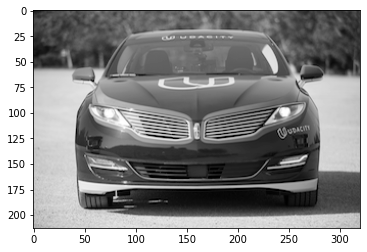

In [7]:
# Importing the image

import cv2
import matplotlib.pyplot as plt

img_path = '/content/drive/My Drive/Artificial Intelligence/DataSet/udacity_sdc.png'

# load color image
rgb_img = cv2.imread(img_path)
# covert to grayscale
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img,cmap='gray')
plt.show()

In [9]:
# Define and visualize the filters

import numpy as np

filter_vals = np.array([[-1,-1,1,1],
                        [-1,-1,1,1],
                        [-1,-1,1,1],
                        [-1,-1,1,1]])

print ('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [10]:
# Defining four different filters 
# all of which are linear combinations of the 'filter_vals' defined above

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

print (filters)

[[[-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]]

 [[ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]]

 [[-1 -1 -1 -1]
  [-1 -1 -1 -1]
  [ 1  1  1  1]
  [ 1  1  1  1]]

 [[ 1  1  1  1]
  [ 1  1  1  1]
  [-1 -1 -1 -1]
  [-1 -1 -1 -1]]]


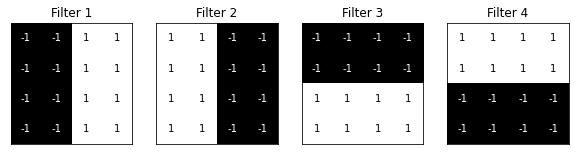

In [15]:
# visualize all four filters
fig = plt.figure(figsize=(10,5))
for i in range(4):
  ax = fig.add_subplot(1,4, i+1, xticks=[],yticks=[])
  ax.imshow(filters[i], cmap='gray')
  ax.set_title('Filter %s' %str(i+1))
  width, height = filters[i].shape
  for x in range(width):
    for y in range(height):
      ax.annotate(str(filters[i][x][y]), xy = (y,x),
                  horizontalalignment = 'center',
                  verticalalignment = 'center',
                  color='white' if filters[i][x][y]<0 else 'black')

# Define a Convolutional Layer

- For a convolutional neural network, we will start by defining a **Convolutional Layer**

Initialize a single convolutional layer so that it contains all the created filters.

We are not training this network, we are just initializing the weights in a convolutional layer so that we can visualize what happens after forward pass through this network.

To define a neural network in PyTorch, you define the layers of a model in the function __init__ and define the forward behavior of a network that applyies those initialized layers to an input (x) in the function forward. In PyTorch we convert all inputs into the Tensor datatype, which is similar to a list data type in Python.

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [19]:
# Define the structure of a class called Net that has a convolutional layer that can contain four 3x3 grayscale filters.

class Net(nn.Module):
  def __init__(self,weight):
    super(Net,self).__init__()
    # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
    k_height, k_width = weight.shape[2:]
    # defines the convolutional layer, assumes there are 4 grayscale filers
    # torch.nn.Conv2d(in_channels,out_channels,kernel_size,stride=1,padding=0,dilation=1,groups=1,bias=True)
    self.conv = nn.Conv2d(1,4,kernel_size=(k_height,k_width),bias=False)
    self.conv.weight = nn.Parameter(weight)

  def forward(self,x):
    # calculates the output of the convolutional layer
    # pre- and post- activation
    conv_x = self.conv(x)
    activated_x = F.relu(conv_x)

    # returns both layers
    return conv_x, activated_x

# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print (model)

# print the weights
print (weight)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)
tensor([[[[-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.]]],


        [[[ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.]]],


        [[[-1., -1., -1., -1.],
          [-1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.]]],


        [[[ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.],
          [-1., -1., -1., -1.],
          [-1., -1., -1., -1.]]]])


# Visualize the output of each filter

In [23]:
# Define a helper function, viz_layer that takes in a specific layer and number of filters, and 
# displays the output of that layer once an image has been passed through

def viz_layer(layer, n_filters=4):
  fig = plt.figure(figsize=(20,20))

  for i in range(n_filters):
    ax = fig.add_subplot(1,n_filters, i+1,xticks=[],yticks=[])
    # grab layer outputs
    ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap = 'gray')
    ax.set_title('Output %s ' %str(i+1))

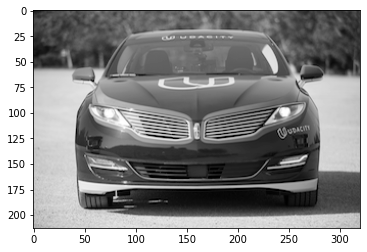

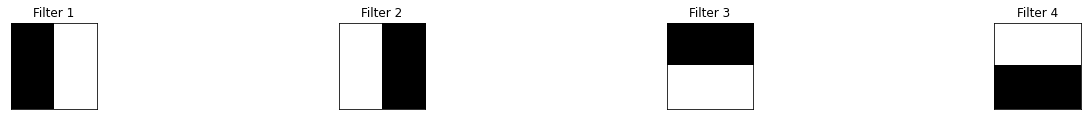

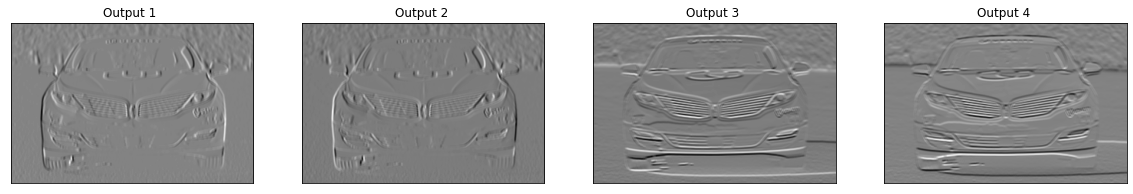

In [25]:
# Let's look at the output of a convolutional layer,before and after Relu activation function is applied
# plot original image
plt.imshow(gray_img,cmap='gray')

# visualize all filters 
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
  ax = fig.add_subplot(1,4,i+1,xticks=[],yticks=[])
  ax.imshow(filters[i],cmap='gray')
  ax.set_title('Filter %s'%str(i+1))

# convert the image into an image tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

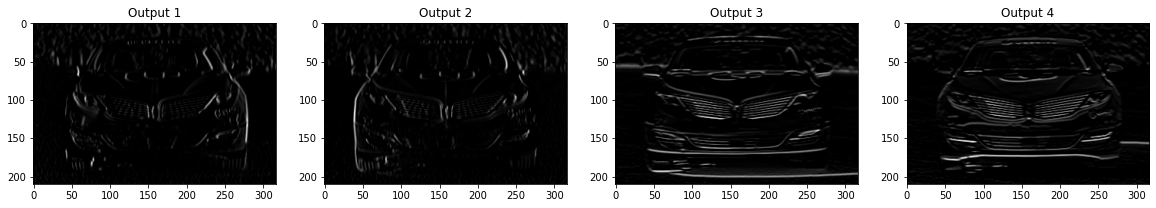

In [33]:
# after a ReLU is applied
# visualize the output of an activated conv layer
viz_layer(activated_layer)

![Screenshot 2020-07-07 at 18 55 01](https://user-images.githubusercontent.com/26361028/86788052-5e167400-c083-11ea-94a8-9f474f21127c.png)


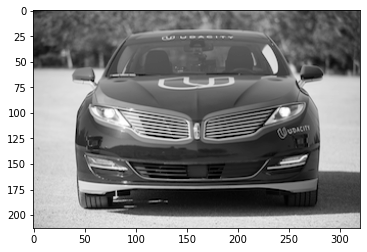

In [27]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!
img_path = '/content/drive/My Drive/Artificial Intelligence/DataSet/udacity_sdc.png'

# load color image 
rgb_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

In [28]:
# define and visualize the filters
import numpy as np

## TODO: Feel free to modify the numbers here, to try out another filter!
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)


Filter shape:  (4, 4)


In [29]:
# Defining four different filters, 
# all of which are linear combinations of the `filter_vals` defined above

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# For an example, print out the values of filter 1
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


![Screenshot 2020-07-07 at 18 57 28](https://user-images.githubusercontent.com/26361028/86788363-b5b4df80-c083-11ea-9928-4783d63334ee.png)


In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# define a neural network with a convolutional layer with four filters
# AND a pooling layer of size (2, 2)
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # defines the convolutional layer, assumes there are 4 grayscale filters
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        # define a pooling layer
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # applies pooling layer
        pooled_x = self.pool(activated_x)
        
        # returns all layers
        return conv_x, activated_x, pooled_x
    
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [31]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

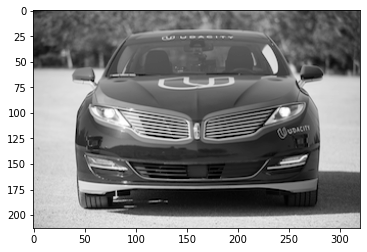

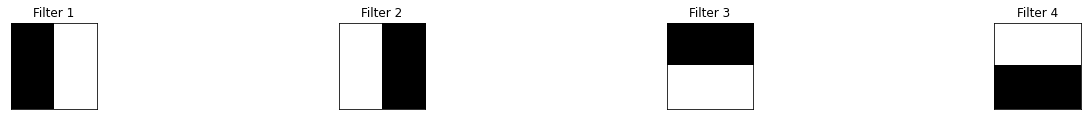

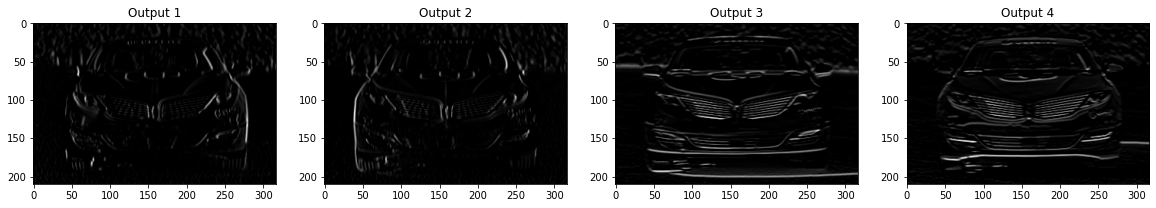

In [32]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get all the layers 
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# visualize the output of the activated conv layer
viz_layer(activated_layer)

### Visualize the output of the pooling layer

Then, take a look at the output of a pooling layer. The pooling layer takes as input the feature maps pictured above and reduces the dimensionality of those maps, by some pooling factor, by constructing a new, smaller image of only the maximum (brightest) values in a given kernel area.

Take a look at the values on the x, y axes to see how the image has changed size.



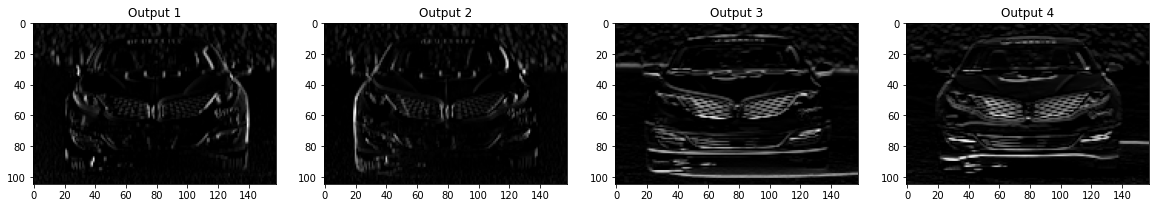

In [34]:
# visualize the output of the pooling layer
viz_layer(pooled_layer)

![Screenshot 2020-07-07 at 19 04 00](https://user-images.githubusercontent.com/26361028/86789151-9f5b5380-c084-11ea-9736-f5f2c87af4df.png)



![Screenshot 2020-07-07 at 19 15 25](https://user-images.githubusercontent.com/26361028/86790583-37a60800-c086-11ea-8db3-f93e7cec043e.png)
![Screenshot 2020-07-07 at 19 15 52](https://user-images.githubusercontent.com/26361028/86790648-47bde780-c086-11ea-879e-6cbafd96e6da.png)
![Screenshot 2020-07-07 at 19 14 39](https://user-images.githubusercontent.com/26361028/86790468-1c3afd00-c086-11ea-969a-4a73bd741612.png)
![Screenshot 2020-07-07 at 19 16 34](https://user-images.githubusercontent.com/26361028/86790757-62905c00-c086-11ea-8b77-9e18826195e0.png)



![Screenshot 2020-07-07 at 19 42 05](https://user-images.githubusercontent.com/26361028/86794274-f0ba1180-c089-11ea-94c5-cb47a3908a2c.png)
![Screenshot 2020-07-07 at 19 42 26](https://user-images.githubusercontent.com/26361028/86794314-fd3e6a00-c089-11ea-948f-c76464e3979d.png)
![Screenshot 2020-07-07 at 19 42 43](https://user-images.githubusercontent.com/26361028/86794344-07606880-c08a-11ea-9e88-53853800ed42.png)
![Screenshot 2020-07-07 at 19 43 07](https://user-images.githubusercontent.com/26361028/86794384-15ae8480-c08a-11ea-960a-2c4967ba7e15.png)


![Screenshot 2020-07-07 at 19 48 02](https://user-images.githubusercontent.com/26361028/86795027-c583f200-c08a-11ea-8ab6-0c11ac540515.png)
